In [1]:
import pandas as pd

In [5]:
serves = pd.read_csv('/Users/Tomi/Downloads/Complete_atp_12_21_CORRECT.csv')

In [6]:
serves.rename(columns = {"ref": "OpponentId"}, inplace = True)

In [13]:
ranks = pd.read_csv('/Users/Tomi/Downloads/lost_w_ids - lost_w_ids.csv')

In [15]:
player_ranks = ranks.groupby("OpponentId")[["winner_rank"]].mean().reset_index()

In [16]:
merged = player_ranks.merge(serves, on = "OpponentId")

In [17]:
merged

,OpponentId,winner_rank,Unnamed: 0,T_1st_ad_%ServesWon,T_1st_ad_Aces,T_1st_ad_Unreturned,T_1st_ad_Returned,T_1st_ad_AvgSpeed,M_1st_ad_%ServesWon,M_1st_ad_Aces,...,M_2nd_d_Aces,M_2nd_d_Unreturned,M_2nd_d_Returned,M_2nd_d_AvgSpeed,W_2nd_d_%ServesWon,W_2nd_d_Aces,W_2nd_d_Unreturned,W_2nd_d_Returned,W_2nd_d_AvgSpeed,year
0,A678,122.000000,10,68.8%,3,1,12,132.0,0.0%,0,...,0,0,3,112.0,66.7%,0,1,2,114.0,2020
1,A678,122.000000,44,33.3%,0,1,2,117.0,50.0%,0,...,0,0,3,112.0,66.7%,0,0,3,113.0,2018
2,A678,122.000000,151,80.0%,0,2,3,134.0,0.0%,0,...,0,1,4,107.0,100.0%,0,0,1,103.0,2012
3,BA47,11.333333,73,71.4%,0,1,6,128.0,0.0%,0,...,0,0,2,99.0,50.0%,0,0,2,99.0,2016
4,BA47,11.333333,93,71.4%,2,6,13,129.0,33.3%,0,...,0,0,10,98.0,46.4%,0,6,22,99.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,n409,2.137931,105,50.0%,1,4,21,111.0,50.0%,0,...,0,1,3,90.0,40.0%,0,1,4,88.0,2015
97,n409,2.137931,124,40.0%,0,5,25,111.0,56.2%,0,...,0,1,8,90.0,50.0%,0,2,2,85.0,2014
98,n409,2.137931,146,63.6%,0,2,9,88.0,40.0%,0,...,0,2,7,88.0,28.6%,0,0,7,86.0,2013
99,n409,2.137931,171,58.3%,0,0,12,115.0,66.7%,0,...,0,1,8,89.0,80.0%,0,1,4,88.0,2012


In [18]:
completed = merged.groupby("OpponentId").mean().sort_values(by = "winner_rank").reset_index()

In [19]:
completed.to_csv("ranked_serves.csv")

In [20]:
completed.columns

Index(['OpponentId', 'winner_rank', 'Unnamed: 0', 'T_1st_ad_Aces',
       'T_1st_ad_Unreturned', 'T_1st_ad_Returned', 'T_1st_ad_AvgSpeed',
       'M_1st_ad_Aces', 'M_1st_ad_Unreturned', 'M_1st_ad_Returned',
       'M_1st_ad_AvgSpeed', 'W_1st_ad_Aces', 'W_1st_ad_Unreturned',
       'W_1st_ad_Returned', 'W_1st_ad_AvgSpeed', 'T_2nd_ad_Aces',
       'T_2nd_ad_Unreturned', 'T_2nd_ad_Returned', 'T_2nd_ad_AvgSpeed',
       'M_2nd_ad_Aces', 'M_2nd_ad_Unreturned', 'M_2nd_ad_Returned',
       'M_2nd_ad_AvgSpeed', 'W_2nd_ad_Aces', 'W_2nd_ad_Unreturned',
       'W_2nd_ad_Returned', 'W_2nd_ad_AvgSpeed', 'T_1st_d_Aces',
       'T_1st_d_Unreturned', 'T_1st_d_Returned', 'T_1st_d_AvgSpeed',
       'M_1st_d_Aces', 'M_1st_d_Unreturned', 'M_1st_d_Returned',
       'M_1st_d_AvgSpeed', 'W_1st_d_Aces', 'W_1st_d_Unreturned',
       'W_1st_d_Returned', 'W_1st_d_AvgSpeed', 'T_2nd_d_Aces',
       'T_2nd_d_Unreturned', 'T_2nd_d_Returned', 'T_2nd_d_AvgSpeed',
       'M_2nd_d_Aces', 'M_2nd_d_Unreturned', 'M_2nd_d_R

In [21]:
first_frame = merged[["OpponentId", "winner_rank",'T_1st_ad_%ServesWon',
             'M_1st_ad_%ServesWon',
             'W_1st_ad_%ServesWon',
             'T_1st_d_%ServesWon',
             'M_1st_d_%ServesWon',
             'W_1st_d_%ServesWon']]

In [22]:
second_frame = merged[["OpponentId", "winner_rank",'T_2nd_ad_%ServesWon',
             'M_2nd_ad_%ServesWon',
             'W_2nd_ad_%ServesWon',
             'T_2nd_d_%ServesWon',
             'M_2nd_d_%ServesWon',
             'W_2nd_d_%ServesWon']]

In [23]:
first_frame

,OpponentId,winner_rank,T_1st_ad_%ServesWon,M_1st_ad_%ServesWon,W_1st_ad_%ServesWon,T_1st_d_%ServesWon,M_1st_d_%ServesWon,W_1st_d_%ServesWon
0,A678,122.000000,68.8%,0.0%,66.7%,76.5%,66.7%,77.3%
1,A678,122.000000,33.3%,50.0%,50.0%,50.0%,33.3%,66.7%
2,A678,122.000000,80.0%,0.0%,55.6%,50.0%,0.0%,75.0%
3,BA47,11.333333,71.4%,0.0%,72.7%,75.0%,0.0%,83.3%
4,BA47,11.333333,71.4%,33.3%,78.9%,72.4%,100.0%,80.0%
...,...,...,...,...,...,...,...,...
96,n409,2.137931,50.0%,50.0%,100.0%,63.2%,41.2%,60.0%
97,n409,2.137931,40.0%,56.2%,56.2%,50.0%,57.1%,57.1%
98,n409,2.137931,63.6%,40.0%,50.0%,100.0%,55.6%,28.6%
99,n409,2.137931,58.3%,66.7%,80.0%,75.0%,80.0%,100.0%


In [24]:
second_frame.dropna(axis = 0, inplace = True)

/Users/Tomi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
second_frame

,OpponentId,winner_rank,T_2nd_ad_%ServesWon,M_2nd_ad_%ServesWon,W_2nd_ad_%ServesWon,T_2nd_d_%ServesWon,M_2nd_d_%ServesWon,W_2nd_d_%ServesWon
0,A678,122.000000,50.0%,20.0%,66.7%,28.6%,33.3%,66.7%
1,A678,122.000000,33.3%,50.0%,50.0%,50.0%,33.3%,66.7%
2,A678,122.000000,68.8%,33.3%,100.0%,100.0%,40.0%,100.0%
3,BA47,11.333333,45.5%,75.0%,75.0%,100.0%,50.0%,50.0%
4,BA47,11.333333,40.6%,55.6%,0.0%,0.0%,30.0%,46.4%
...,...,...,...,...,...,...,...,...
96,n409,2.137931,76.9%,66.7%,50.0%,0.0%,25.0%,40.0%
97,n409,2.137931,53.8%,28.6%,0.0%,0.0%,77.8%,50.0%
98,n409,2.137931,63.6%,40.0%,50.0%,100.0%,55.6%,28.6%
99,n409,2.137931,66.7%,40.0%,100.0%,0.0%,44.4%,80.0%


In [26]:
for colum in second_frame.iloc[:,2:].columns.tolist():
    print(colum)
    
    second_frame[colum] = second_frame[colum].apply(lambda x : float(x.strip("%")))

T_2nd_ad_%ServesWon
M_2nd_ad_%ServesWon
W_2nd_ad_%ServesWon
T_2nd_d_%ServesWon
M_2nd_d_%ServesWon
W_2nd_d_%ServesWon


/var/folders/_j/qzn5nc8s42j0sqkmm8dhc5th0000gn/T/ipykernel_71879/2851543227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_frame[colum] = second_frame[colum].apply(lambda x : float(x.strip("%")))


In [27]:
for colum in first_frame.iloc[:,2:].columns.tolist():
    print(colum)
    
    first_frame[colum] = first_frame[colum].apply(lambda x : float(x.strip("%")))

T_1st_ad_%ServesWon
M_1st_ad_%ServesWon
W_1st_ad_%ServesWon
T_1st_d_%ServesWon
M_1st_d_%ServesWon
W_1st_d_%ServesWon


/var/folders/_j/qzn5nc8s42j0sqkmm8dhc5th0000gn/T/ipykernel_71879/3717599786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_frame[colum] = first_frame[colum].apply(lambda x : float(x.strip("%")))


In [28]:
second_frame

,OpponentId,winner_rank,T_2nd_ad_%ServesWon,M_2nd_ad_%ServesWon,W_2nd_ad_%ServesWon,T_2nd_d_%ServesWon,M_2nd_d_%ServesWon,W_2nd_d_%ServesWon
0,A678,122.000000,50.0,20.0,66.7,28.6,33.3,66.7
1,A678,122.000000,33.3,50.0,50.0,50.0,33.3,66.7
2,A678,122.000000,68.8,33.3,100.0,100.0,40.0,100.0
3,BA47,11.333333,45.5,75.0,75.0,100.0,50.0,50.0
4,BA47,11.333333,40.6,55.6,0.0,0.0,30.0,46.4
...,...,...,...,...,...,...,...,...
96,n409,2.137931,76.9,66.7,50.0,0.0,25.0,40.0
97,n409,2.137931,53.8,28.6,0.0,0.0,77.8,50.0
98,n409,2.137931,63.6,40.0,50.0,100.0,55.6,28.6
99,n409,2.137931,66.7,40.0,100.0,0.0,44.4,80.0


In [29]:
second_frame.to_csv("second_frame.csv")

In [30]:
merged.to_csv("merged.csv")

In [39]:
import numpy as np
import matplotlib.pyplot as plt
Opponent="Opponent"
Players = ["aa","bb","cc",'dd']
Serve_position = ["Ad_Wide", "Ad_Mid", "Ad_T",
           "Deuce_T", "Deuce_Mid", "Deuce_Wide"]
#dummy data
serves = np.array([[2.4, 0.0, 3.0, 1.0, 2.7, 0.6],[2.4, 0.0, 3.0, 1.0, 2.7, 0.6],
                   [0.3, 0.3,0.3, 0.3, 0.3, 0.3],
                   [0.3, 0.3, 0.3, 0.3, 0.3, 0.3]])

In [32]:
individ_first = first_frame.groupby("OpponentId").mean().reset_index()

In [33]:
individ_first.columns


Index(['OpponentId', 'winner_rank', 'T_1st_ad_%ServesWon',
       'M_1st_ad_%ServesWon', 'W_1st_ad_%ServesWon', 'T_1st_d_%ServesWon',
       'M_1st_d_%ServesWon', 'W_1st_d_%ServesWon'],
      dtype='object')

In [42]:
rearranged

,W_1st_ad_%ServesWon,M_1st_ad_%ServesWon,T_1st_ad_%ServesWon,T_1st_d_%ServesWon,M_1st_d_%ServesWon,W_1st_d_%ServesWon
mean,56.998148,59.42037,72.971296,64.283333,52.0,49.773148


(<matplotlib.image.AxesImage at 0x121a0fd90>,
 <matplotlib.colorbar.Colorbar at 0x121a3ca90>)

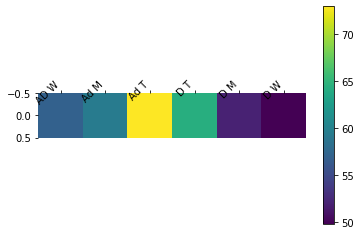

In [40]:
ranked_first = individ_first.sort_values(by = "winner_rank")

output = ranked_first.iloc[:3,:].agg({"T_1st_ad_%ServesWon": ["mean"],
                            'M_1st_ad_%ServesWon': ["mean"],
                             'W_1st_ad_%ServesWon': ["mean"],
                             'T_1st_d_%ServesWon': ["mean"],
                             'M_1st_d_%ServesWon': ["mean"],
                            'W_1st_d_%ServesWon':["mean"]})

output

rearranged = output[["W_1st_ad_%ServesWon",
                     "M_1st_ad_%ServesWon",
                     "T_1st_ad_%ServesWon",
                     "T_1st_d_%ServesWon",
                     "M_1st_d_%ServesWon",
                     "W_1st_d_%ServesWon"]]

rearranged

col_labs = rearranged.columns.tolist()

heatmap(rearranged,row_labels = "mean", col_labels = ["AD W", "Ad M", "Ad T", "D T", "D M", "D W"])

In [35]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",size=20)
    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
#     ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)
    #ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    #ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    #ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar




color_array = np.array([0.3]*6)
Opponent="Opponent"
Players = ["","","",'']
Serve_position = ["Ad_Wide", "Ad_Mid", "Ad_T",
"Deuce_T", "Deuce_Mid", "Deuce_Wide"]

for i, player in enumerate(player_ids):
    print(player)
    player_serves = np.stack((serves[i],serves[i], color_array, color_array))
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(10)

    im, cbar = heatmap(player_serves, Players, Serve_position, ax=ax,
                       cmap="YlGn", cbarlabel="% 1st serves won")
    #texts = annotate_heatmap(im, valfmt="{x:.1f} t")
    ax.set_title(f"{player}")
    fig.tight_layout()
    plt.show()




In [64]:
def heat_plotter(num_rows):
    ranked_first = individ_first.sort_values(by = "winner_rank")

    output = ranked_first.iloc[:num_rows,:].agg({"T_1st_ad_%ServesWon": ["mean"],
                            'M_1st_ad_%ServesWon': ["mean"],
                             'W_1st_ad_%ServesWon': ["mean"],
                             'T_1st_d_%ServesWon': ["mean"],
                             'M_1st_d_%ServesWon': ["mean"],
                            'W_1st_d_%ServesWon':["mean"]})


    rearranged = output[["W_1st_ad_%ServesWon",
                     "M_1st_ad_%ServesWon",
                     "T_1st_ad_%ServesWon",
                     "T_1st_d_%ServesWon",
                     "M_1st_d_%ServesWon",
                     "W_1st_d_%ServesWon"]]

    
    col_labs = rearranged.columns.tolist()

    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(10)
    color_array = np.array([0.3]*6).reshape(1,6)
    player_serves =  np.hstack([rearranged, rearranged, color_array, color_array]).reshape(4,6)
    im, cbar = heatmap(player_serves, ["","","","","",""], rearranged.columns.tolist(), ax=ax,
                           cmap="YlGn", cbarlabel="% 1st serves won")

In [74]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [86]:
interact(heat_plotter, x=(0,172), num_rows =10)

interactive(children=(IntSlider(value=10, description='num_rows', max=30, min=-10), Output()), _dom_classes=('…

<function __main__.heat_plotter(num_rows)>

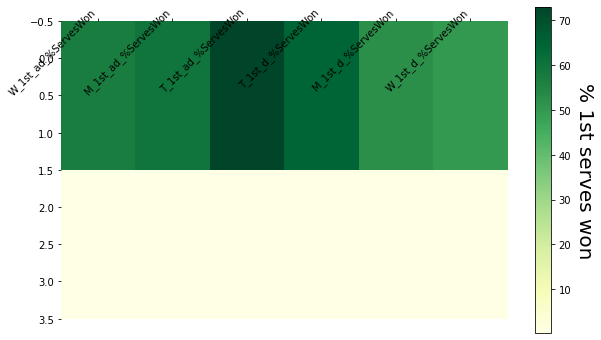

In [63]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
color_array = np.array([0.3]*6).reshape(1,6)
player_serves =  np.hstack([rearranged, rearranged, color_array, color_array]).reshape(4,6)
im, cbar = heatmap(player_serves, ["","","","","",""], rearranged.columns.tolist(), ax=ax,
                       cmap="YlGn", cbarlabel="% 1st serves won")